In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import sklearn.preprocessing
import matplotlib
import zipfile
from PIL import Image

In [0]:
from google.colab import files
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sklearn.preprocessing as skl
from PIL import Image, ImageOps
from os import scandir, getcwd
from os import listdir
import os
from os.path import isfile, join
import zipfile                          # Per importació a partir de ZIP
import io

In [6]:
!wget "https://github.com/gdsa-upc/2019-Equip4/raw/master/tb2108.zip" -O Dades.zip

--2019-12-04 09:49:09--  https://github.com/gdsa-upc/2019-Equip4/raw/master/tb2108.zip
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gdsa-upc/2019-Equip4/master/tb2108.zip [following]
--2019-12-04 09:49:10--  https://raw.githubusercontent.com/gdsa-upc/2019-Equip4/master/tb2108.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2419916 (2.3M) [application/zip]
Saving to: ‘Dades.zip’

Dades.zip           100%[===================>]   2.31M  --.-KB/s    in 0.03s   

2019-12-04 09:49:10 (78.3 MB/s) - ‘Dades.zip’ saved [2419916/2419916]



In [0]:
f = zipfile.ZipFile("Dades.zip",'r')
for file in f.namelist():
    f.extract(file,"./Dades/")  # Guardar en el directori /Dades/
f.close()

In [0]:
from os.path import isfile, join

# Obtener tots els fitxers a la carpeta TRAIN  
files_train = [f for f in os.listdir("./Dades/tb2108/tb2018/train") if isfile(join("./Dades/tb2108/tb2018/train", f))]
# Guardar imatges de train en una matriu
x_train = np.array([np.array(Image.open("./Dades/tb2108/tb2018/train/"+file)) for file in files_train])

# Obtener tots els fitxers a la carpeta TEST
files_test = [f for f in os.listdir("./Dades/tb2108/tb2018/test") if isfile(join("./Dades/tb2108/tb2018/test", f))]
# Guardar imatges de test en una matriu
x_test = np.array([np.array(Image.open("./Dades/tb2108/tb2018/test/"+file)) for file in files_test])

In [0]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [14]:
print("x_train shape:", x_train.shape) 
print("x_test shape:", x_test.shape)

x_train shape: (1671, 28, 28)
x_test shape: (1006, 28, 28)


In [0]:
train = x_train.reshape(1671,784)
test = x_test.reshape(1006,784)

In [0]:
from sklearn.preprocessing import normalize

train_norm = normalize(train,  norm='l2')
test_norm = normalize(test,  norm='l2')

In [0]:
train_ntrasp= train_norm.transpose()


In [18]:
train_ntrasp

array([[0.04000596, 0.04401969, 0.03171178, ..., 0.06515921, 0.05813849,
        0.03341308],
       [0.04061212, 0.04087542, 0.03295538, ..., 0.06646239, 0.06782824,
        0.0268357 ],
       [0.04121827, 0.04381007, 0.03295538, ..., 0.06594112, 0.06241338,
        0.00999761],
       ...,
       [0.04000596, 0.02452525, 0.00808339, ..., 0.00286701, 0.01994948,
        0.03551784],
       [0.04000596, 0.02871761, 0.01150329, ..., 0.00364892, 0.01909451,
        0.03420237],
       [0.04000596, 0.03207149, 0.01274689, ..., 0.0177233 , 0.01738455,
        0.03314999]])

In [0]:
from numpy import matmul
matrix = matmul(test_norm, train_ntrasp)

In [0]:
from numpy import argsort
ranks= argsort(matrix, axis=1)[:,::-1]

In [27]:
from PIL import Image, ImageOps
# get the original images for visualization
x_train_images = x_train.reshape(1671, 28, 28)
x_test_images = x_test.reshape(1006, 28, 28)

h,w = (28, 28)
new_image= Image.new('RGB', (h*15,w*10))
print(np.shape(new_image))


(280, 420, 3)


(28, 28)


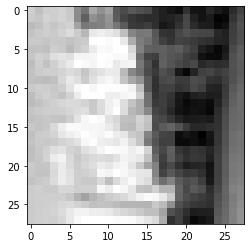

In [28]:
plt.imshow(x_train_images[1],cmap='gray')
print(x_train_images[1].shape)

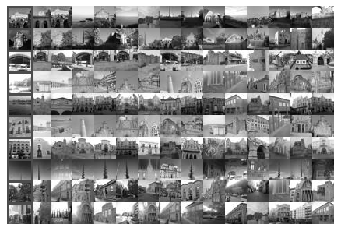

In [29]:

h,w = (28, 28)
new_image= Image.new('RGB', (h*15,w*10))

# Visualize ranks of the 10 queries
offset = 0 # it will show results from query #'offset' to #offset+10
for q in range(10):
  ranks_q = ranks[q*(offset+1),:]
  for i in range(15):
      new_image.paste(Image.fromarray(x_train_images[ranks_q[i]]), (h*(1+i),w*q))

  # visualize query
      ima_q = Image.fromarray(x_test_images[q*(offset+1)])
      ima_q = ImageOps.expand(ima_q, border=3, fill='red')

      new_image.paste(ima_q, (0,w*q))

plt.imshow(new_image)
plt.axis('off')
plt.show()
